In [1]:
import os
import csv
import math

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy as sp
from scipy import io
from scipy.io import wavfile as wav
from scipy import signal as sgnp
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy import fftpack
from scipy import stats

import h5py


%matplotlib inline

In [45]:
sampling_freq = 44100 # sampling rate of the day 2007 data is 44.1 kHz

blk161 = 'C:\\Users\\abre049.UOA\\Documents\\data\\Crandall 2007\\blk161\\sngblk1610308wtrigC23-Mar140834\\sng163839_0308v3.mat'
blk161_2 = 'C:\\Users\\abre049.UOA\\Documents\\data\\Crandall 2007\\blk161\\sngblk1610307wtrigA23-Mar125009\\sng073839_0307v9.mat'

song = sp.io.loadmat(blk161)['sng']
song = [val[0] for val in song]
trace = sp.io.loadmat(blk161)['e2'][0]
song2 = sp.io.loadmat(blk161_2)['sng']
song2 = [val[0] for val in song2]
trace2 = sp.io.loadmat(blk161_2)['e2'][0]
print trace
print song

[420 578 161 ..., 746 560  44]
[330, 473, 542, 572, 556, 448, 281, 106, -40, -2, 69, 61, 76, 128, 120, 95, 124, 169, 194, 253, 290, 400, 483, 518, 427, 347, 247, 175, 82, 75, 108, 80, 23, -50, -169, -289, -349, -329, -265, -151, -64, 14, 41, 28, -83, -181, -201, -131, 21, 149, 166, 112, 44, -38, -93, -99, -103, -56, 36, 151, 340, 489, 530, 494, 427, 348, 319, 347, 448, 574, 642, 621, 515, 354, 142, -24, -165, -233, -216, -162, -39, 131, 281, 394, 495, 576, 602, 592, 530, 393, 222, 85, -9, 40, 183, 231, 229, 261, 291, 281, 271, 294, 260, 272, 303, 420, 515, 580, 550, 458, 362, 281, 160, 114, 127, 101, 74, 14, -84, -137, -162, -124, -65, 23, 105, 159, 179, 127, -11, -136, -189, -159, -3, 181, 237, 201, 146, 112, 75, 57, 51, 46, 103, 211, 379, 510, 588, 567, 484, 417, 373, 365, 466, 625, 700, 690, 608, 448, 261, 104, -37, -94, -112, -58, 47, 200, 340, 433, 531, 574, 612, 601, 538, 455, 313, 157, 52, 11, 127, 320, 397, 405, 446, 478, 421, 346, 308, 273, 284, 314, 424, 564, 674, 671, 560, 4

In [72]:
nyquist = sampling_freq / 2.0
b, a = sgnp.butter(1, 1000/nyquist, btype='low')
f_trace = sgnp.filtfilt(b, a, trace)

b, a = sgnp.butter(1, 1000/nyquist, btype='low')
f_trace2 = sgnp.filtfilt(b, a, trace2)

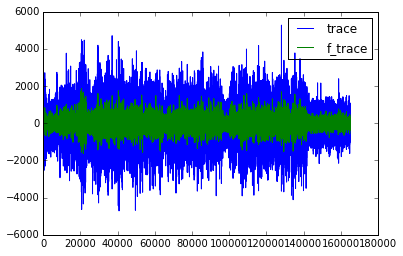

In [4]:
plt.plot(trace, label='trace')
plt.plot(f_trace, label='f_trace')
plt.legend()
plt.show()

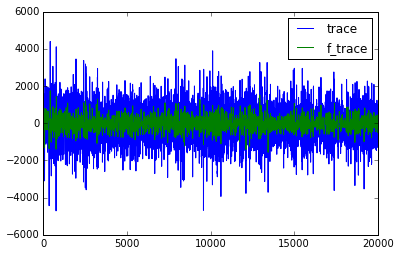

In [5]:
plt.plot(trace[40000:60000], label='trace')
plt.plot(f_trace[40000:60000], label='f_trace')
plt.legend()
plt.show()

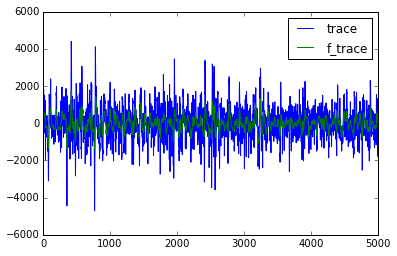

In [6]:
plt.plot(trace[40000:45000], label='trace')
plt.plot(f_trace[40000:45000], label='f_trace')
plt.legend()
plt.show()

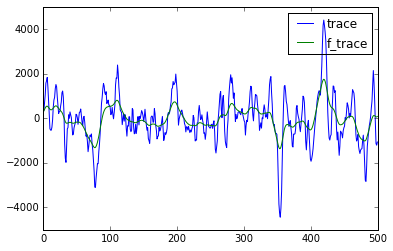

In [7]:
plt.plot(trace[40000:40500], label='trace')
plt.plot(f_trace[40000:40500], label='f_trace')
plt.legend()
plt.show()

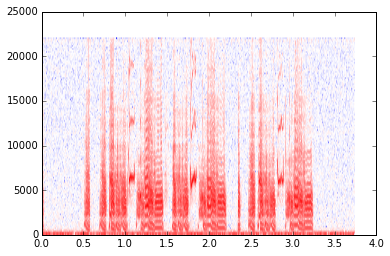

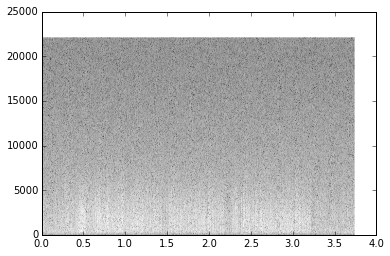

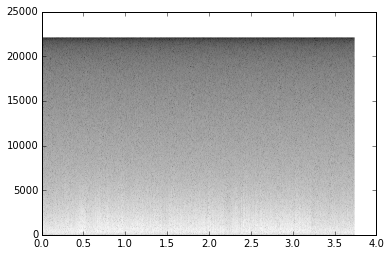

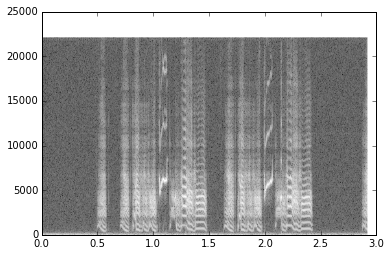

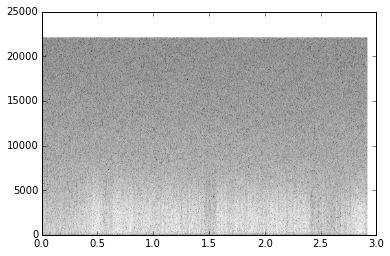

In [46]:
plt.specgram(song, Fs=sampling_freq, cmap=mpl.cm.bwr)
plt.show()

plt.specgram(trace, Fs=sampling_freq, cmap=mpl.cm.gray, NFFT=256*2, noverlap=128*2, pad_to=256*16)
plt.show()

plt.specgram(f_trace, Fs=sampling_freq, cmap=mpl.cm.gray, NFFT=256*2, noverlap=128*2, pad_to=256*16)
plt.show()

plt.specgram(song2, Fs=sampling_freq, NFFT=256*2, noverlap=128*2, pad_to=256*16)
plt.show()

plt.specgram(trace2, Fs=sampling_freq, cmap=mpl.cm.gray, NFFT=256*2, noverlap=128*2, pad_to=256*16)
plt.show()

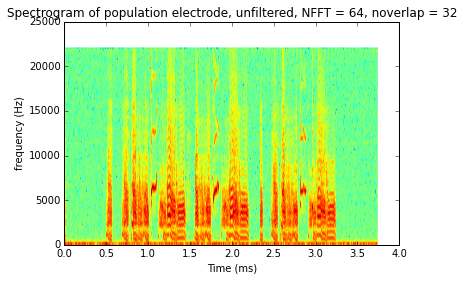

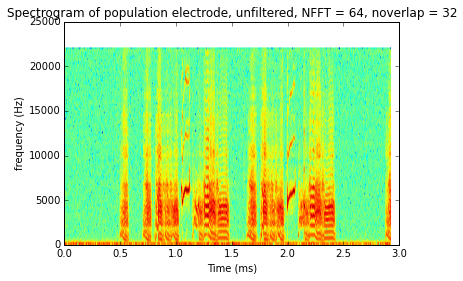

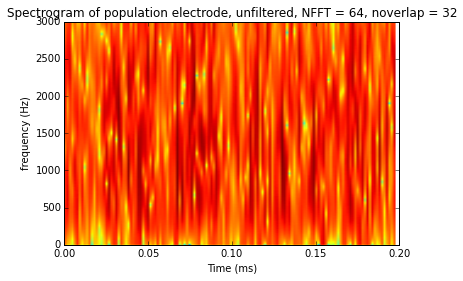

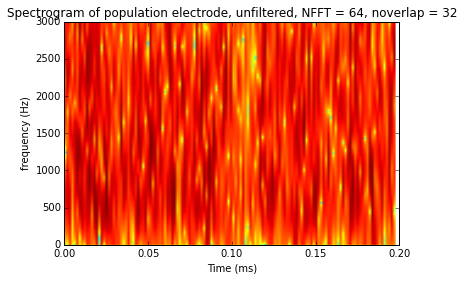

In [79]:
# Pxx, freqs, bins, im = plt.specgram(song[44100*1:44100*1.1], Fs=sampling_freq)
# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,y1,2000))
# plt.show()

Pxx, freqs, bins, im = plt.specgram(song[:], Fs=sampling_freq)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
plt.xlabel('Time (ms)')
plt.ylabel('frequency (Hz)')
plt.show()

Pxx, freqs, bins, im = plt.specgram(song2[:], Fs=sampling_freq)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
plt.xlabel('Time (ms)')
plt.ylabel('frequency (Hz)')
plt.show()

Pxx, freqs, bins, im = plt.specgram(trace[44100*3:44100*3.2], Fs=sampling_freq, NFFT=256/2, noverlap=128/2, pad_to=256*16)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,3000))
plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
plt.xlabel('Time (ms)')
plt.ylabel('frequency (Hz)')
plt.show()

Pxx, freqs, bins, im = plt.specgram(trace2[44100*2.09:44100*2.29], Fs=sampling_freq, NFFT=256/2, noverlap=128/2, pad_to=256*16)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,3000))
plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
plt.xlabel('Time (ms)')
plt.ylabel('frequency (Hz)')
plt.show()

# Pxx, freqs, bins, im = plt.specgram(trace[44100*2:44100*2.1], Fs=sampling_freq, NFFT=256/4, noverlap=128/4, pad_to=256*16)
# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,y1,3000))
# plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
# plt.xlabel('Time (ms)')
# plt.ylabel('frequency (Hz)')
# plt.show()



# Pxx, freqs, bins, im = plt.specgram(trace2[44100*2:44100*2.1], Fs=sampling_freq, NFFT=256/4, noverlap=128/4, pad_to=256*16)
# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,y1,3000))
# plt.title('Spectrogram of population electrode, unfiltered, NFFT = 64, noverlap = 32')
# plt.xlabel('Time (ms)')
# plt.ylabel('frequency (Hz)')
# plt.show()



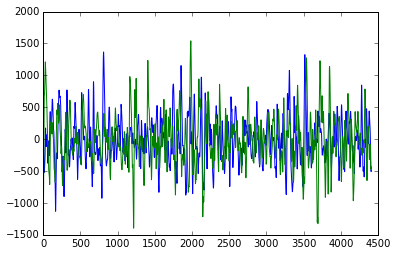

In [74]:
plt.plot(f_trace[44100*2:44100*2.1])
plt.plot(f_trace2[44100*1.24:44100*1.34])
plt.show()